Trying to make a synthetic DEM from some input image.

Using a demo image downloaded from google maps. Reading the png, making it binary, and assuming water depth increases linearly with distance from land.

In [1]:
# import packages
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

In [2]:
# read screenshot of google maps image
img = plt.imread('demo_maps.png')

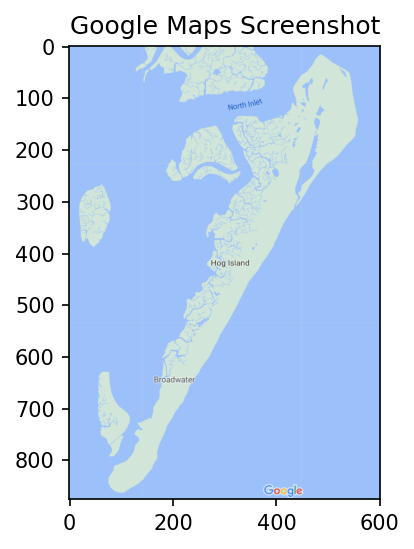

In [3]:
# visualize png
plt.figure(dpi=150)
plt.imshow(img)
plt.title('Google Maps Screenshot')
plt.show()

In [4]:
# transform this image into a binary one using a simple threshold
binary_img = img[:, :, 0]
binary_img[binary_img > 0.7] = 1
binary_img[binary_img <= 0.7] = 0
binary_img = binary_img.astype(bool)

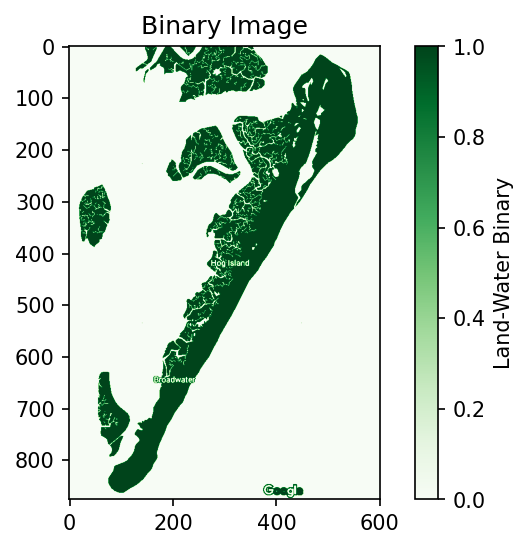

In [5]:
# visualize binary
plt.figure(dpi=150)
plt.imshow(binary_img, cmap='Greens')
plt.title('Binary Image')
plt.colorbar(fraction=0.045, label='Land-Water Binary')
plt.show()

In [6]:
# do a euclidean distance transform to approximate water depth away from land
idt = distance_transform_edt(1-binary_img)
water_depth = idt.copy()
water_depth[water_depth>50] = 50  # setting a max depth of 50 

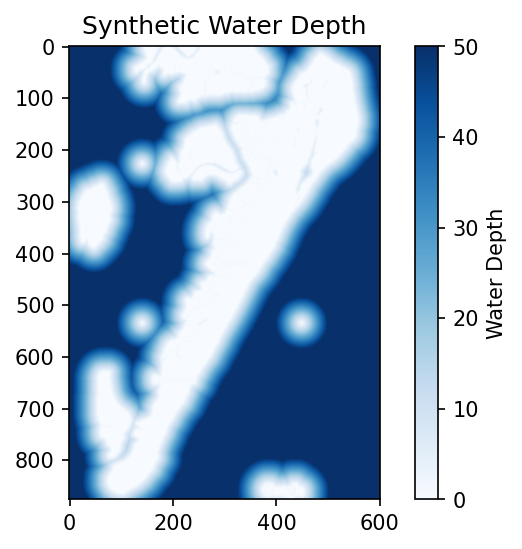

In [7]:
# visualize water depth
plt.figure(dpi=150)
plt.imshow(water_depth, cmap='Blues')
plt.title('Synthetic Water Depth')
plt.colorbar(fraction=0.045, label='Water Depth')
plt.show()

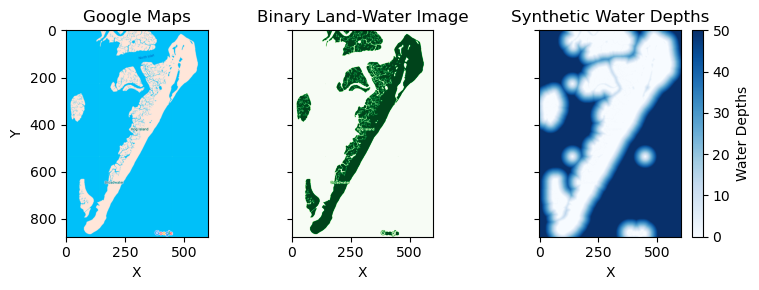

In [20]:
# plot everything together
fig, ax = plt.subplots(1, 3, dpi=100, facecolor='w', sharey=True, figsize=(8, 3))

ax[0].imshow(img)
ax[0].set_title('Google Maps')
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X')

ax[1].imshow(binary_img, cmap='Greens')
ax[1].set_title('Binary Land-Water Image')
ax[1].set_xlabel('X')

im2 = ax[2].imshow(water_depth, cmap='Blues')
ax[2].set_title('Synthetic Water Depths')
plt.colorbar(im2, fraction=0.045, label='Water Depths')
ax[2].set_xlabel('X')

plt.tight_layout()
plt.savefig('MapToWaterDepths.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

pl